# Importing llamas_pyjamas modules

In [ ]:
import os
import sys
import numpy as np
import pickle
import ray
import pkg_resources
import glob
import traceback

sys.path.append('/Users/slh/Documents/Projects/Magellan_dev/LLAMAS/llamas-pyjamas/')

ray.init(ignore_reinit_error=True)
from llamas_pyjamas.Trace.traceLlamasMulti import main # type: ignore
from llamas_pyjamas.Extract.extractLlamas import ExtractLlamas # type: ignore

outputdir = '/Users/slh/Documents/Projects/Magellan_dev/LLAMAS/llamas-pyjamas/llamas_pyjamas/output'

In [ ]:
# Get absolute path to llamas_pyjamas package
package_path = pkg_resources.resource_filename('llamas_pyjamas', '')
package_root = os.path.dirname(package_path)

print(f"Package path: {package_path}")
print(f"Package root: {package_root}")

In [ ]:
# Configure Ray runtime environment
runtime_env = {
    "py_modules": [package_root],
    "env_vars": {"PYTHONPATH": f"{package_root}:{os.environ.get('PYTHONPATH', '')}"}
}

# Initialize Ray
ray.shutdown()
ray.init(runtime_env=runtime_env)

Running the trace finding algorithm on all of the HDU extensions

In [ ]:
#fitsfile = '/Users/slh/Documents/Projects/Magellan_dev/LLAMAS/LLAMAS_2024-11-20T13_15_33.000_mef.fits'

fitsfile = '/Users/slh/Documents/Projects/Magellan_dev/LLAMAS/llamas-pyjamas/llamas_pyjamas/Docs/DATA/LLAMAS_2024-08-23T16_12_14.742_mef.fits'
main(fitsfile)

In [ ]:
##This code needs more automation added 
def extract(tracepkl):
    with open(tracepkl, "rb") as tracer:
        trace = pickle.load(tracer)
    extraction1 = ExtractLlamas(trace)
    extraction1.saveExtraction()
    return

In [ ]:

files = glob.glob(os.path.join(outputdir,'*.pkl'))
for file in files:
    try:
        extract(file)
    except Exception as e:
        print(f'file {file} failed')
        traceback.print_exc()

In [ ]:
# llamas_pyjamas/QA/qa_trace.py
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_trace_qa(trace_obj, save_dir=None):
    """Plot QA for fiber tracing"""

    # Plot 2: Individual fiber profiles
    fig, axes = plt.subplots(4, 4, figsize=(15, 15))
    axes = axes.ravel()
    
    for i, sset in enumerate(trace_obj.bspline_ssets[:16]):  # Plot first 16 fibers
        ax = axes[i]
        yy = np.linspace(-5, 5, 100)
        profile = sset.value(yy)[0]
        ax.plot(yy, profile, 'b-', label='Fit')
        ax.set_title(f'Fiber {i}')
        ax.grid(True)
    
    plt.tight_layout()
    #plt.savefig(os.path.join(save_dir, f'profiles_{trace_obj.bench}_{trace_obj.side}.png'))
    plt.show()
    

    return

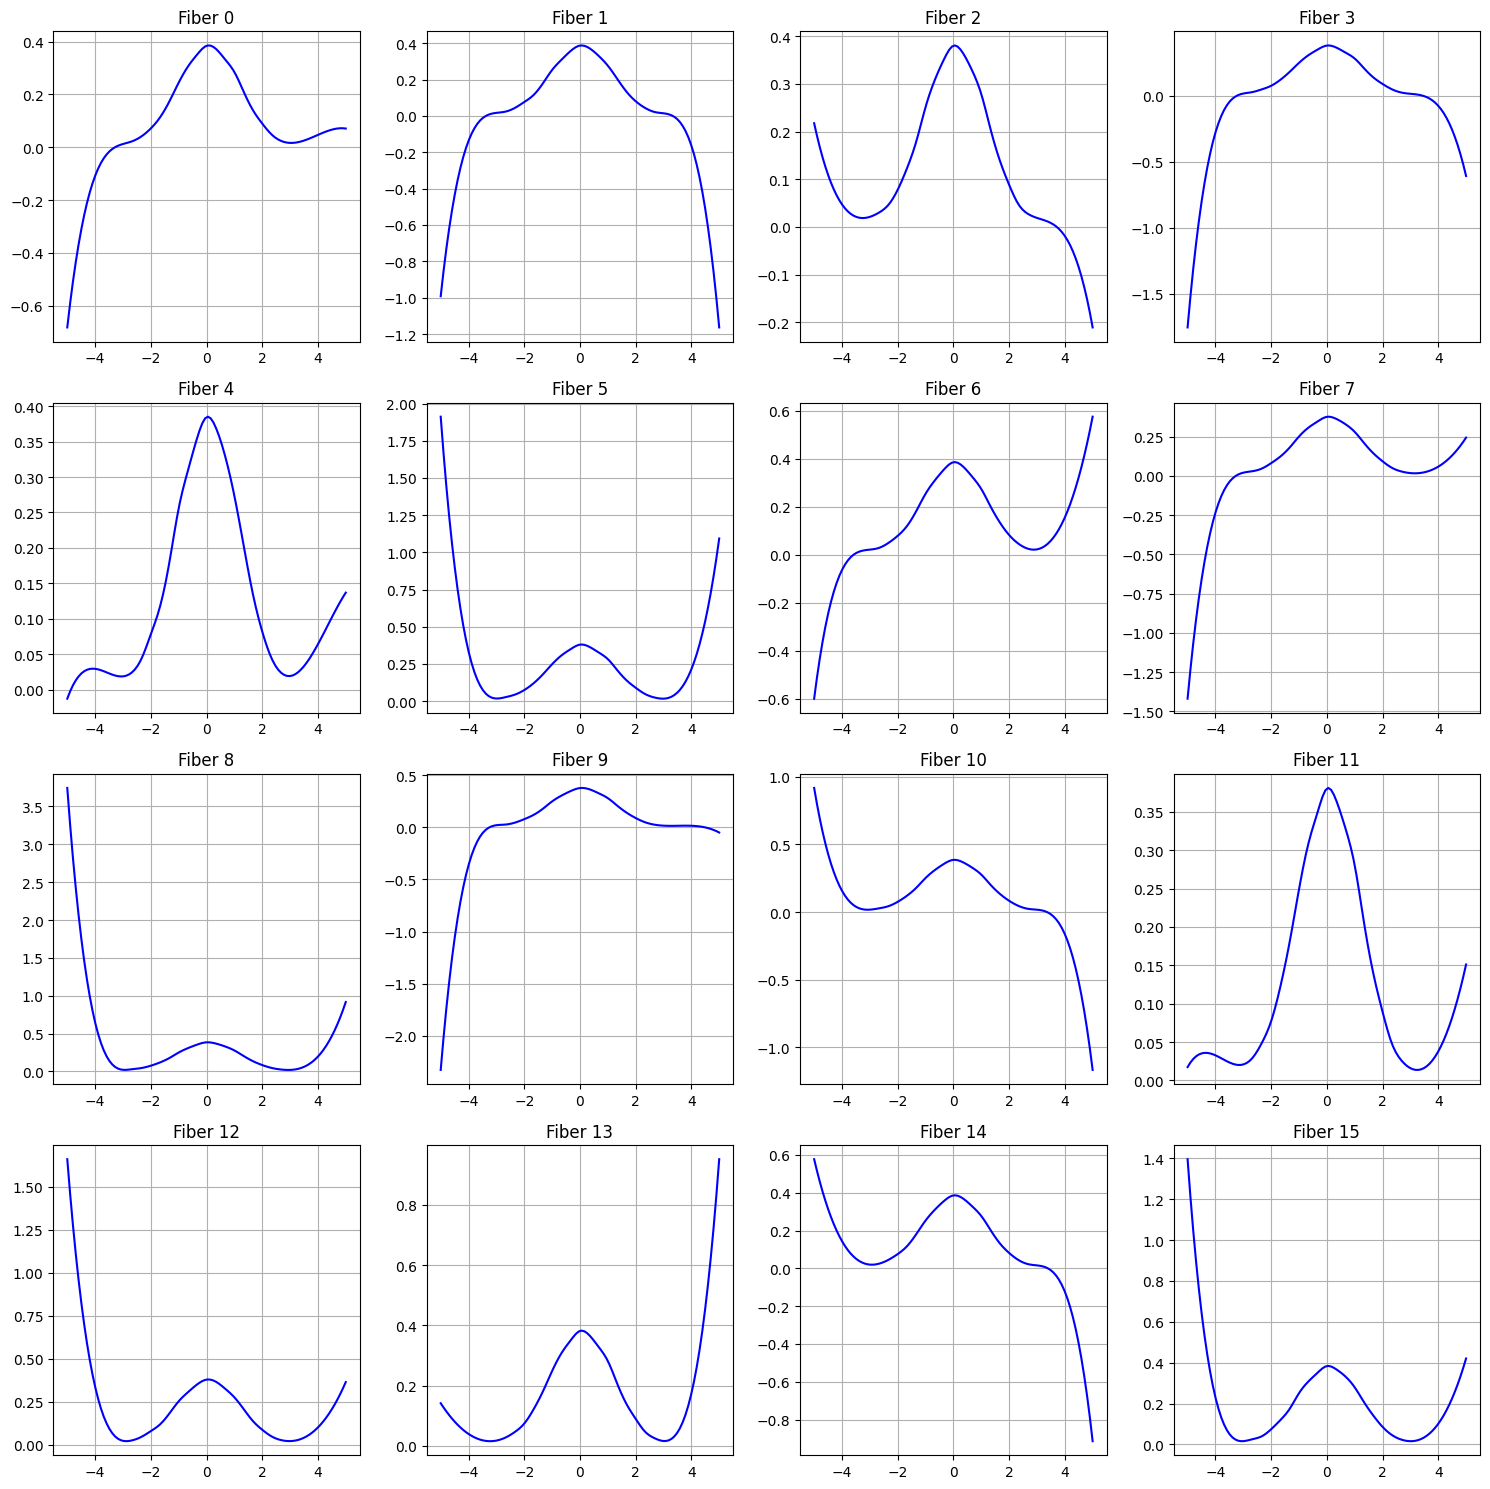

In [14]:
with open("output/Blue_3_A_traces.pkl", "rb") as tracer:
    obj = pickle.load(tracer)

plot_trace_qa(obj)